In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [16]:
file_path = '/Users/chiaradraghini/Documents/iot_wi_project/data/dataset/'
dataframe = pd.read_csv(file_path+'Dataset_iotwi.csv')
dataframe.drop(['Unnamed: 0'], axis=1, inplace=True)
dataframe

,Time Interval,Average Packet Size,Standard Deviation Packet Size,Median Packet Size,Average Packet Intervals,Standard Deviation Packet Intervals,Median Packet Intervals,Inbound Packets,Outbound Packets,Total Packets
0,"(0, 0.5)",956.114286,208.242569,1023.0,0.004413,0.005065,0.000492,47,58,105
1,"(0.5, 1.0)",933.644928,241.450296,961.0,0.003510,0.004490,0.000742,77,61,138
2,"(1.0, 1.5)",919.227273,252.522348,888.5,0.003205,0.004270,0.000585,95,59,154
3,"(1.5, 2.0)",955.713115,227.083975,1078.0,0.004066,0.004688,0.001061,64,58,122
4,"(2.0, 2.5)",929.561404,248.768508,1028.0,0.004378,0.004975,0.001581,61,53,114
...,...,...,...,...,...,...,...,...,...,...
1200,"(600.0, 600.5)",1031.739583,321.145294,1131.0,0.004865,0.006184,0.000956,78,18,96
1201,"(600.5, 601.0)",974.734043,331.268146,1108.5,0.005336,0.006885,0.001814,73,21,94
1202,"(601.0, 601.5)",993.343434,331.198755,1126.0,0.004406,0.006043,0.001021,80,19,99
1203,"(601.5, 602.0)",995.216495,317.852994,1118.0,0.004635,0.006014,0.000910,74,23,97


In [17]:
cols_to_keep = ["Average Packet Size","Standard Deviation Packet Size","Median Packet Size","Average Packet Intervals","Standard Deviation Packet Intervals", "Median Packet Intervals" ,"Inbound Packets", "Outbound Packets","Total Packets"]
df_filtered = dataframe.loc[:,cols_to_keep]

In [18]:
file_path = '/Users/chiaradraghini/Documents/iot_wi_project/data/dataset/'
data_for_persona = pd.read_csv(file_path+'Dataset_iotwi_persona.csv', sep = ";") #a column "Persona" with "truth table" was added
data_for_persona.drop(['Unnamed: 0'], axis=1, inplace=True)
persona = data_for_persona["Persona"]

In [19]:
X = df_filtered
y = data_for_persona['Persona']

In [20]:
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [22]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    
    
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

/Users/chiaradraghini/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Accuracy,Precision,Recall
Logistic Regression,0.867550,0.955128,0.818681
Support Vector Machines,0.860927,0.955128,0.809783
Decision Trees,0.837748,0.852564,0.836478
Random Forest,0.890728,0.967949,0.843575
Naive Bayes,0.857616,0.967949,0.798942
K-Nearest Neighbor,0.867550,0.923077,0.837209


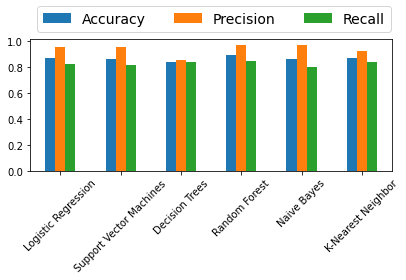

In [49]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()


In [25]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    """Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve."""
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

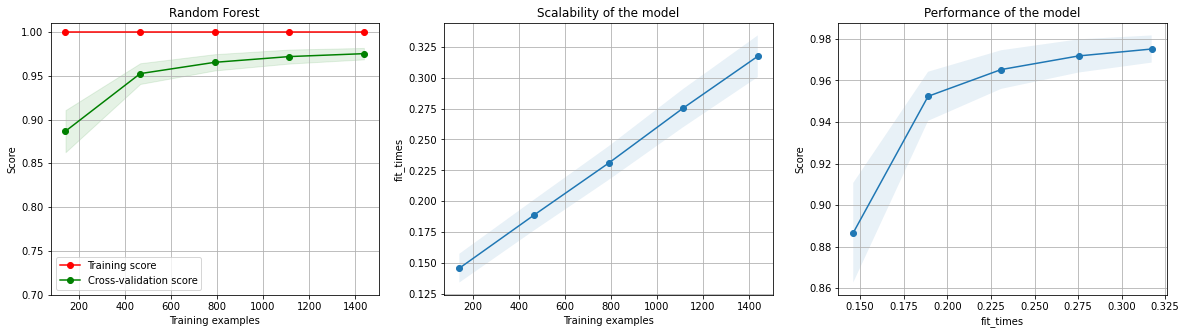

In [26]:
#Learning curve
X, y = load_digits(return_X_y=True)

title = "Random Forest"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

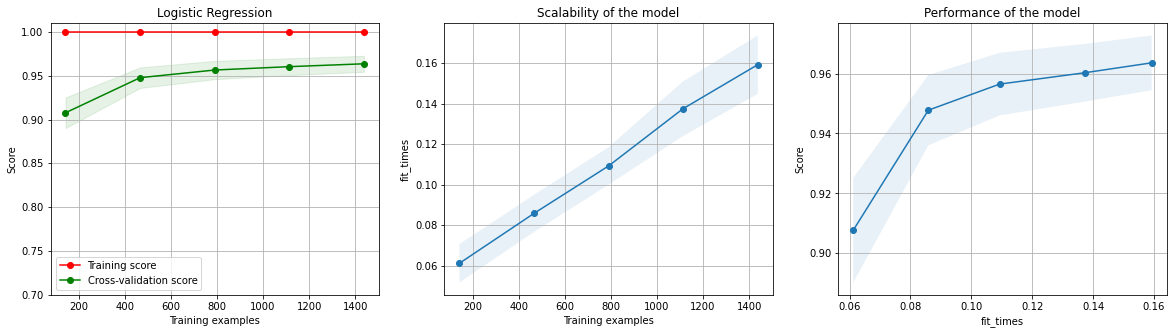

In [27]:
X, y = load_digits(return_X_y=True)

title = "Logistic Regression"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

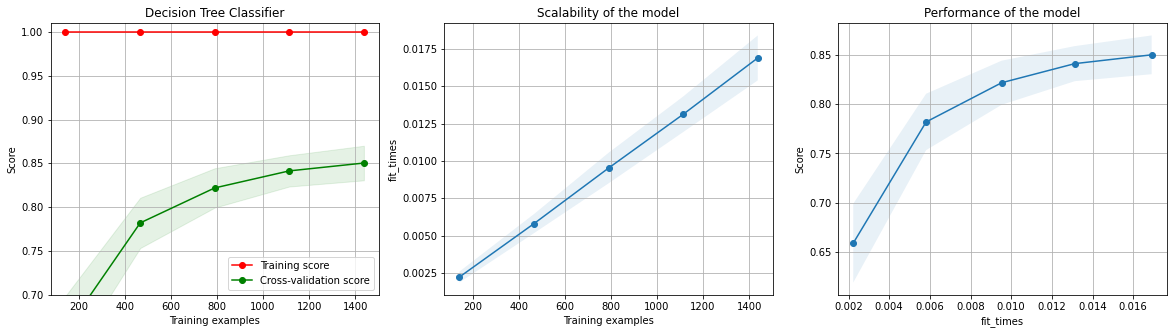

In [28]:
X, y = load_digits(return_X_y=True)

title = "Decision Tree Classifier"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()